In [62]:
import numpy as np
import pandas as pd
import cv2
import skimage as ski
from PIL import Image
import matplotlib.pylab as plt

# 1st Practicum

## RGB and BGR image comparison

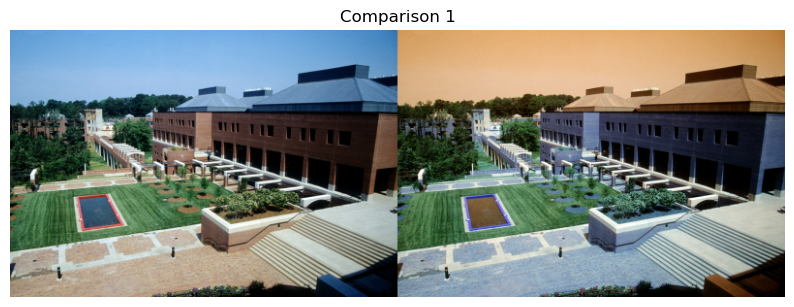

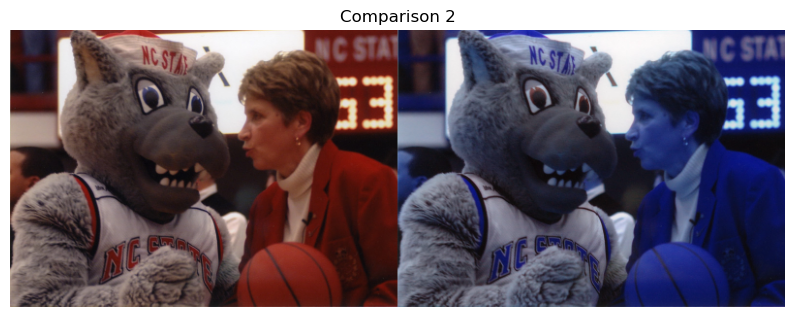

In [63]:
urls = [
    'https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg',
    'https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg',
    # 'https://placekitten.com/800/571' # don't use this. it will give an error response 571
]

for i, url in enumerate(urls):
    img = ski.io.imread(url)
    img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_frame = cv2.hconcat((img, img_bgr))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(final_frame)
    plt.axis("off")
    plt.title(f"Comparison {i+1}")
    plt.show()

## Get image size

Image resolution: (height x width) = 286 x 400


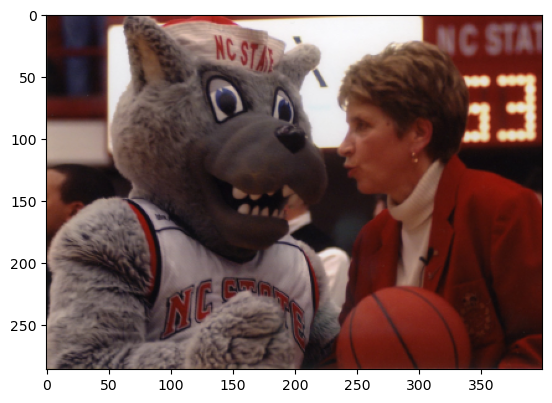

In [64]:
height = img.shape[0]
width = img.shape[1]

print(f'Image resolution: (height x width) = {height} x {width}')

plt.imshow(img)
plt.show()

## Adding Horizontal and Vertical Line on Image

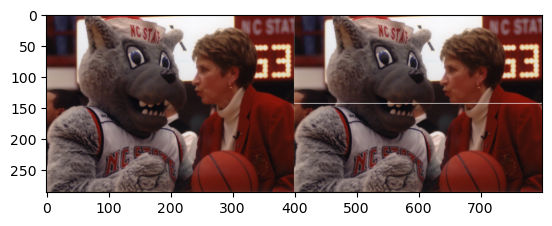

In [65]:
# img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_2 = img.copy()
img_3 = img.copy()

for y in range(width):
    img_3[int(height / 2), y] = [255, 255, 255]
    
final_frame = cv2.hconcat((img_2, img_3))
plt.imshow(final_frame)
plt.show()

## Questions

1. Explain why Python code execution in this practicum module is performed using Google Colab ?

    **Answer:** The reason for using Google Colab is that it is much easier than using local tools such as Jupyter Notebook or VSCode. Users don't need to set up any related tools like Python or manage dependencies with Anaconda. If the program requires heavy computation, Google Colab is the best platform, especially if the user doesn't have a device with sufficient specifications.

2. Explain the purpose of each library in practicum step eight. Are all of these libraries required for this practicum session?

    **Answer:** From these libraries:
    ```py
    import numpy as np
    import pandas as pd
    import cv2
    import skimage as ski
    from PIL import Image
    import matplotlib.pylab as plt
    ```

    Only the libraries `skimage`, `cv2`, and `matplotlib` are used if the user displays the image with `matplotlib` instead of `cv2.imshow()`.

    `numpy` and `pandas` are needed for mathematical computations, from simple arithmetic to more complex math. `cv2` (OpenCV) is used for managing image data, which includes reading and transforming images. `PIL` is a simpler and more lightweight alternative to `cv2` (OpenCV). `matplotlib` is useful for data visualization.
    
3. In the trial run for step 9, there is a snippet of program code as follows:

    ```py
    img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    ```

    What is the purpose of this program code, and what is the impact if it is not executed?

    **Answer:** That code will resize the image, create a new image, and store it in the img variable. The resize scale is **0.5** of its original width and height `(fx=0.5, fy=0.5)`. If this code is not executed, the image will not be resized and will remain at its original size.


4. Consider the following snippet of program code:

    ```py
    for y in range(width):
        img_3[int(height / 2), y] = [255, 255, 255]
    ```

    What is the purpose of the code `[255, 255, 255]` ?

    **Answer:** That code will change the color of the pixels along the image's entire width at the middle of its height to white.

5. Explain the relationship between pixels and high or low image resolution.

    **Answer:** High image resolution means an image will have a large number of pixels. Low image resolution means an image will not have as many pixels, which can make the image look blurry.

---

# 2nd Practicum - Understanding Channel in Color Space

In [66]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np

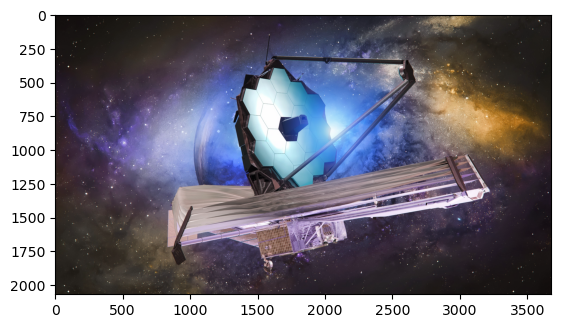

In [67]:
img = cv2.imread('./assets/james-webb-space-telescope.jpg')

if img is None:
    raise Exception('Image not found!')

plt.imshow(img)

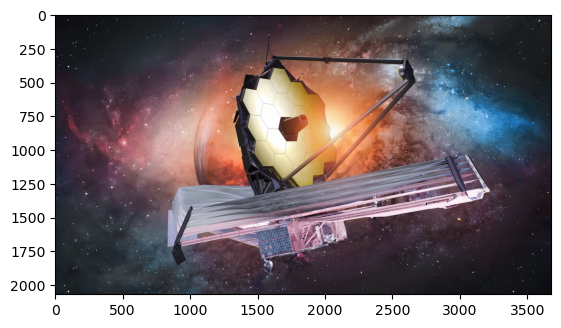

In [68]:
# convert to RGB like the original 
if img is None:
    raise Exception('Image not found!')

img_2 = img.copy()

img_3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_3)

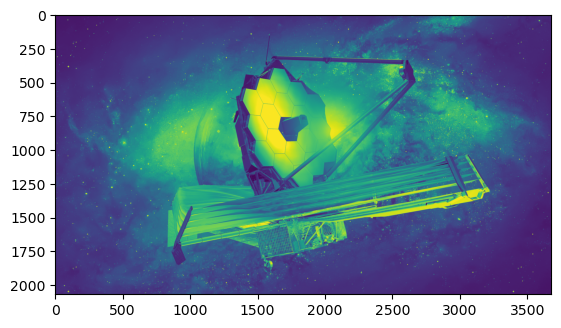

In [69]:
# grayscale image
img_gray = cv2.imread('./assets/james-webb-space-telescope.jpg', cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise Exception('Image not found!')

plt.imshow(img_gray)

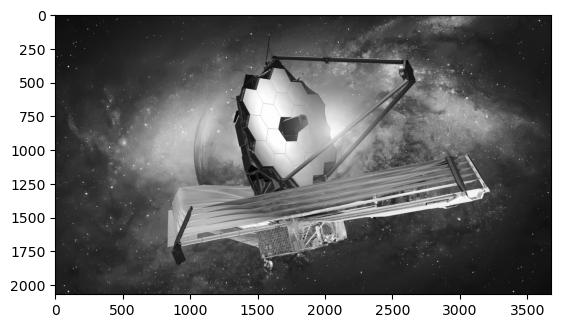

In [70]:
# only display colormap `gray`
plt.imshow(img_gray, cmap='gray') # type: ignore

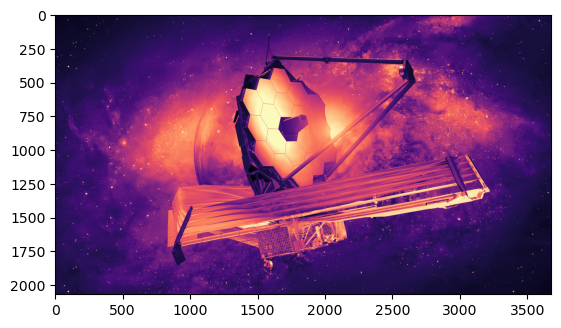

In [71]:
# only display colormap `magma`
plt.imshow(img_gray, cmap='magma')  # type: ignore

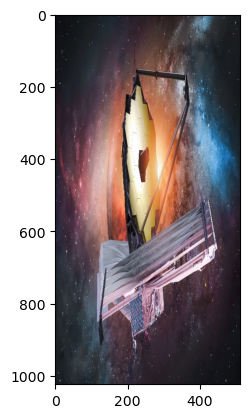

In [72]:
img_4 = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (512, 1024)) # type: ignore
plt.imshow(img_4)

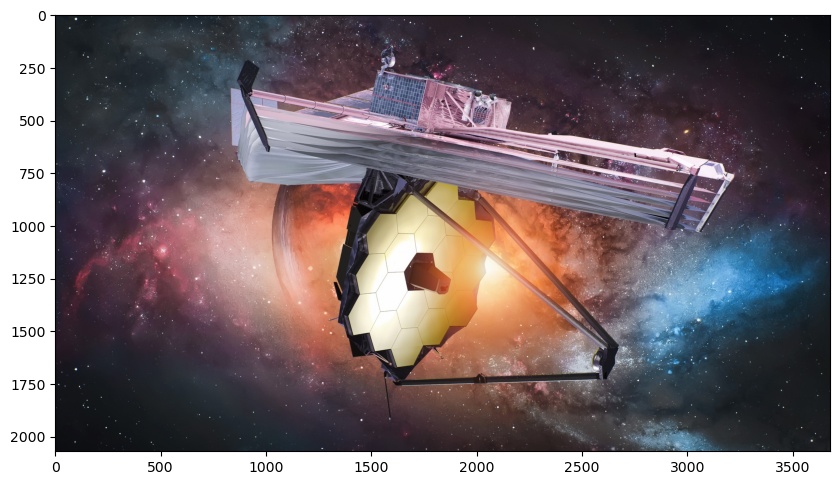

In [73]:
img_5 = cv2.flip(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 0) # type: ignore

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(img_5)

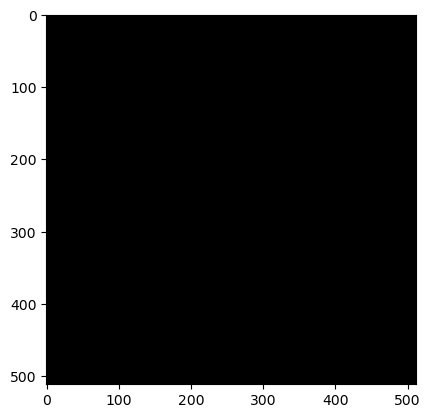

In [74]:
# display a black image
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
plt.imshow(black_img)

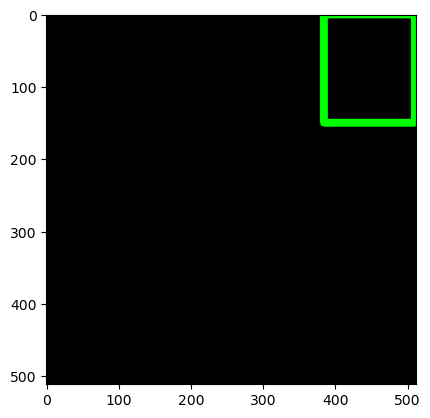

In [75]:
cv2.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)
plt.imshow(black_img)

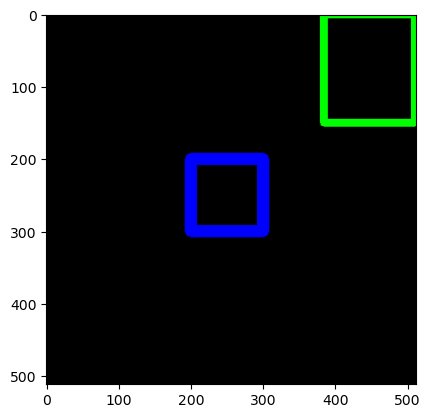

In [76]:
cv2.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)
plt.imshow(black_img)

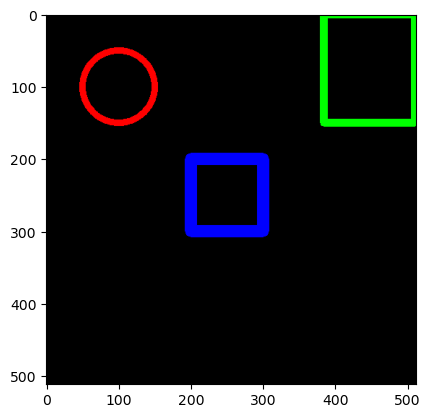

In [77]:
cv2.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)
plt.imshow(black_img)

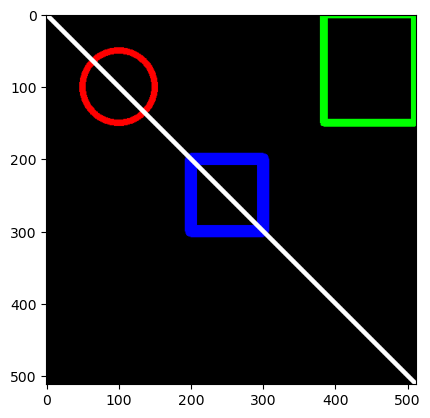

In [78]:
cv2.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

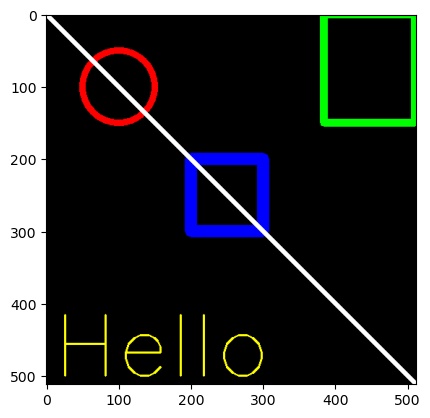

In [79]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(black_img, text='Hello', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(black_img)

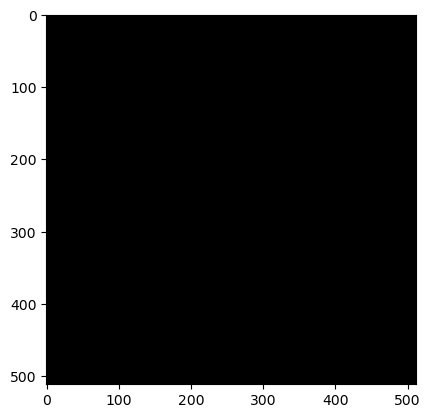

In [80]:
black_img_2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)
plt.imshow(black_img_2)

In [81]:
vertices = np.array([
    [100, 300],
    [200, 200],
    [400, 300],
    [200, 400]
], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [82]:
pts = vertices.reshape((-1, 1, 2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

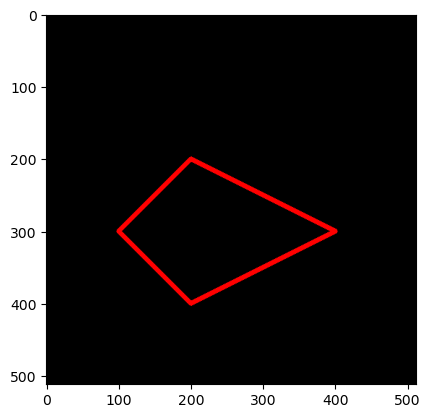

In [83]:
cv2.polylines(black_img_2, [pts], isClosed=True, color=(255, 0, 0), thickness=5)
plt.imshow(black_img_2)